# Prediction using Decision Tree Algorithm

## For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically

## by Ayushi Agiwal

In [ ]:
from IPython.display import Image

# Decision Tree

1. Decision Tree algorithm belongs to the family of supervised learning algorithms
2. It is one of the most widely used practical methods for inference over supervised data.
3. Decision tree algorithm can be used for solving both regression as well as classification problems
4. A decision tree represents a procedure for classifying categorical data based on their attributes

### Gini Score

Steps to Calculate Gini for a split
1. Calculate Gini for sub-nodes , using formula sum of square of probability for
success and failure:
$$ p^{2} + q^{2} $$
Where,
p is the probability of "Success";
q is the probability of "Failure"

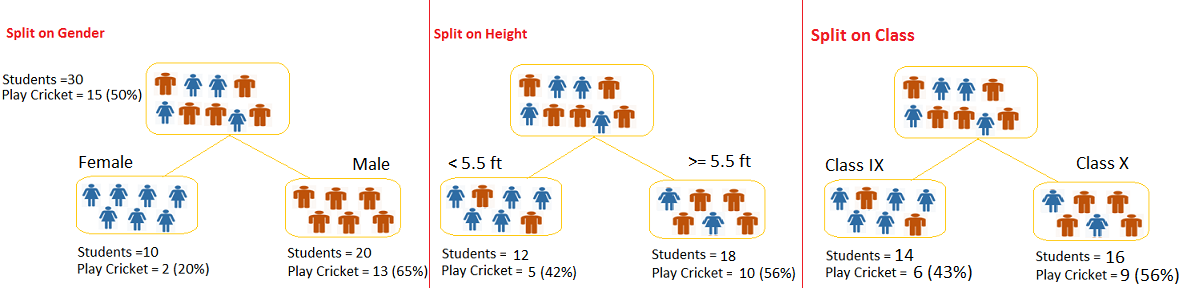

In [ ]:
Image(filename='decision_tree.jpg')

In [ ]:
# GINI for Sub-Node Female:
gf=round((0.2**2)+(0.8**2),2)
print("GINI for Sub-Node Female:", gf)
# GINI for Sub-Node Male:
gm=round((0.65**2)+(0.35**2),2)
print("GINI for Sub-Node Male:", gm)
# Calculate weighted Gini for Split Gender:
weightedgini=round((10/30)*gf + (20/30)*gm,2)
print("Weighted Gini for Gender Split:", weightedgini)


GINI for Sub-Node Female: 0.68
GINI for Sub-Node Male: 0.55
Weighted Gini for Gender Split: 0.59


Gini score for Split on Gender is highest, hence, the node split will take place on Gender
You might often come across the term ‘Gini Impurity’ which is determined by subtracting the gini
value from 1. So mathematically we can say,
##### GiniImpurity = 1 − Gini

In [ ]:
#import required libraries
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Label encoding refers to converting labels into numeric form

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [ ]:
df['Species'].unique()

array([0, 1, 2])

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
X=df.iloc[:, 1:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Y=df.iloc[:, -1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2])

In [ ]:
np.array(y_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2])

## Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

## Visualizing decision tree

In [ ]:
# Install required libraries
!pip install pydotplus

In [ ]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


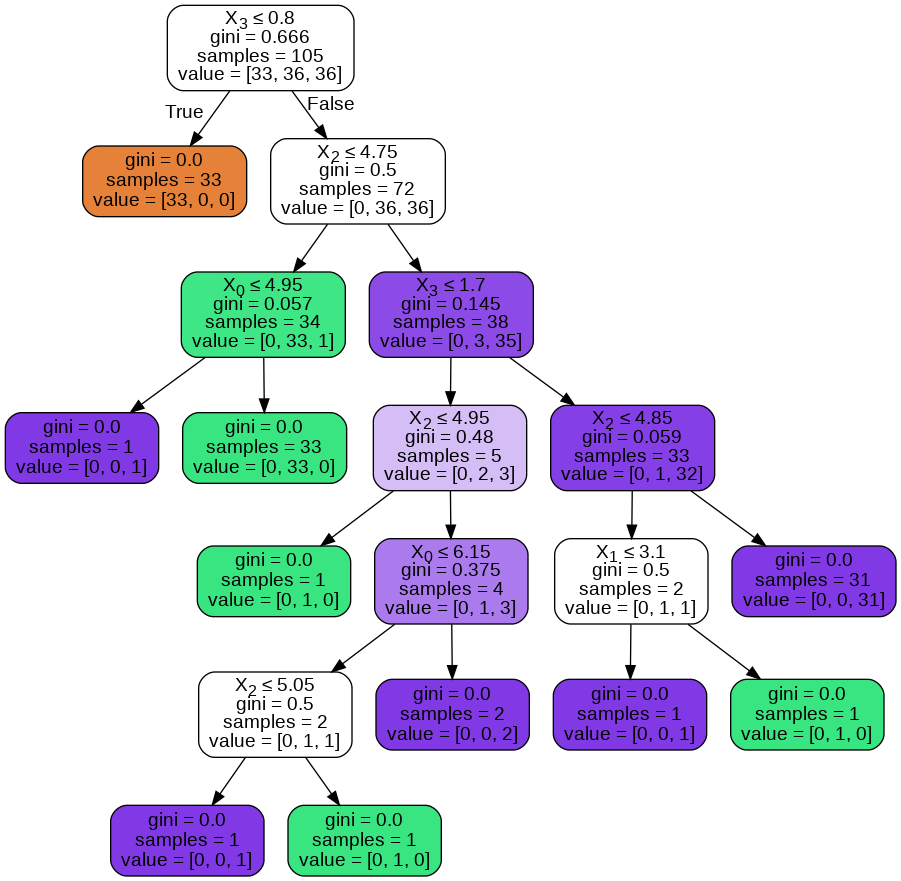

In [ ]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())